Regression model? Regression is a statistical method used to determine the relationship between a dependent variable and one or more independent variables. In a regression model, the goal is to find a functional relationship between the independent variables and the dependent variable. This functional relationship is used to predict the value of the dependent variable for new values of the independent variables.

In [11]:
# global imports and configuration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix





#ta bort nedanstående rad senare
# set plot style
sns.set_style("darkgrid")

In [40]:
df = pd.read_csv('data_assignment2.csv')

finalData = df.dropna()

df.head(5)

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


**A. Find a linear regression model that relates the living area to the selling price.**

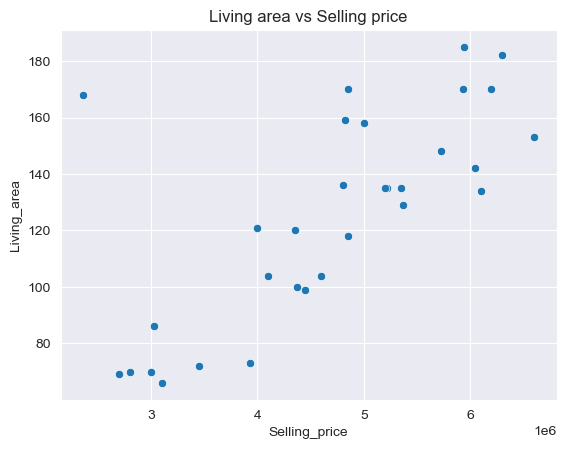

In [27]:
#Plot the data before finding linear regression model 
sns.scatterplot(x='Selling_price', y='Living_area', data=df)
plt.title('Living area vs Selling price')
plt.show()

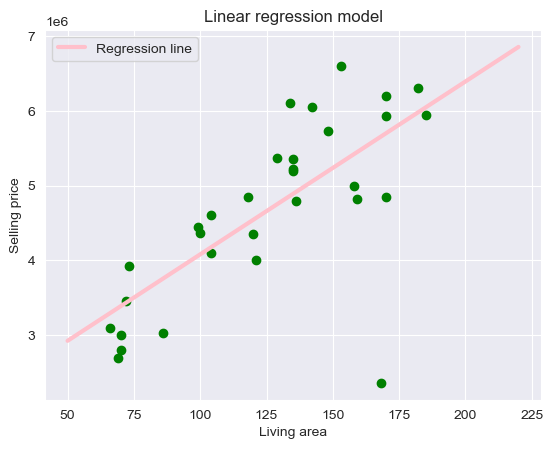

In [37]:
# Remove any rows where either Living area or Selling price are NaN, as they only provide useful insight together.
cleaned_df = df.dropna(subset=['Living_area', 'Selling_price'])

# Select Living area as the feature for the X axis, and Selling price as the feature for the Y axis
x = cleaned_df['Living_area'].values.reshape(-1, 1)
y = cleaned_df['Selling_price'].values.reshape(-1, 1)

# Create a linear regression model and fit it to the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

# Define the x values to be used for the regression line
x_line = np.array([[50], [220]])

# Predict the corresponding y values for the regression line
y_line = model.predict(x_line)

# Create a scatter plot of the data points and plot the regression line on top of it
plt.scatter(x, y, color='green')
plt.plot(x_line, y_line, color='pink', linewidth=3, label='Regression line')

# Set the axis labels and title
plt.xlabel('Living area')
plt.ylabel('Selling price')
plt.title('Linear regression model')

# Add a legend and display the plot
plt.legend()
plt.show()

**B. What are the values of the slope and intercept of the regression line?**

In [47]:

# Fit a linear regression model to the 'Living_area' and 'Selling_price' data
model = LinearRegression().fit(finalData[['Living_area']], finalData['Selling_price'])

# Get the slope and intercept values from the model
slope = model.coef_
intercept = model.intercept_

# Print the slope and intercept values with labels
print(f"Slope: {slope[0]:.2f}")
print(f"Intercept: {intercept:.2f}")


Slope: 23125.57
Intercept: 1767086.28


**C. Use this model to predict the selling prices of houses which have living area $10 m^{2}$, $100 m^{2}$, $150 m^{2}$, $200 m^{2}$ and $1000 m^{2}$.** 

In [46]:
# Define the living area values to predict prices for
living_area_values = [10, 100, 150, 200, 1000]

# Create a df with the living area values
living_area_df = pd.DataFrame({'Living_area': living_area_values})

# Calculate the predicted selling prices for the living area values
predicted_prices = slope * living_area_df['Living_area'] + intercept

# Add the predicted prices as a new column to the DataFrame
living_area_df['Selling_price'] = predicted_prices

# Set the column order to have Living_area as the first column
living_area_df = living_area_df[['Living_area', 'Selling_price']]

# Print the DataFrame with a title and formatted prices
print('Figure 2: Predicted selling prices based on living area')

# Format predicted prices as integers with thousand separators
formatted_prices = living_area_df['Selling_price'].apply(lambda x: f'{x:,.0f}')

# Update the Selling_price column with formatted prices
living_area_df['Selling_price'] = formatted_prices

# Display the df
display(living_area_df)


Figure 2: Predicted selling prices based on living area


,Living_area,Selling_price
0,10,"1,998,342"
1,100,"4,079,643"
2,150,"5,235,921"
3,200,"6,392,200"
4,1000,"24,892,653"


Figure 3: Residual plot


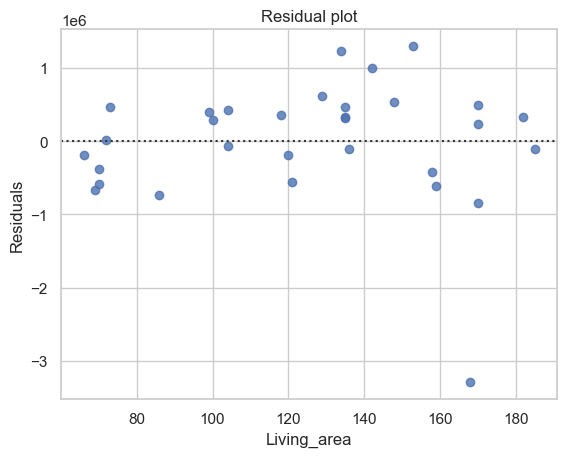

In [45]:

sns.set(style='whitegrid')

# create a residual plot
sns.residplot(data=finalData, x='Living_area', y='Selling_price').set(title='Residual plot')

# Change y label
plt.ylabel('Residuals')

# Print figure number
print('Figure 3: Residual plot')

# Display the plot
plt.show()


**E.Is this a useful model? Are there any limitations? What could you do to
improve the models ability to predict selling prices? Can this model be used in
other areas than Landvetter?.**

**Task 2**

**A. Visualize the data. Can you gain any insights from the visulisation?**

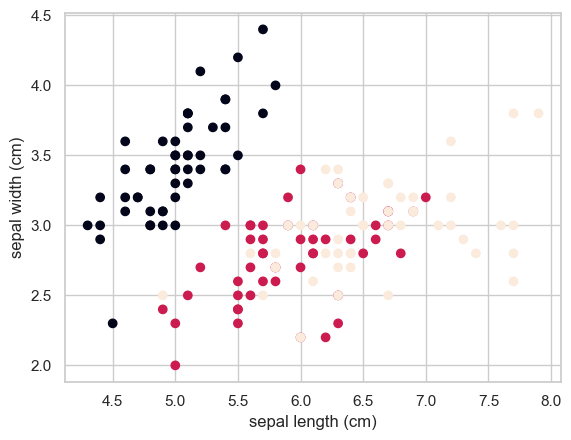

In [52]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

**From the scatter plot, we can see that there are three distinct clusters of samples that correspond to the three target values (setosa, versicolor, and virginica). Setosa samples are generally separated from the other two species along the sepal length dimension, while versicolor and virginica samples are more closely grouped together.**

**We can also see that there are some overlap between versicolor and virginica samples along both the sepal length and width dimensions, which may explain why the logistic regression model may have some difficulty in correctly classifying those samples**

**B. Use a confusion matrix to evaluate the use of logitic regression to classify the iris dataset.** 

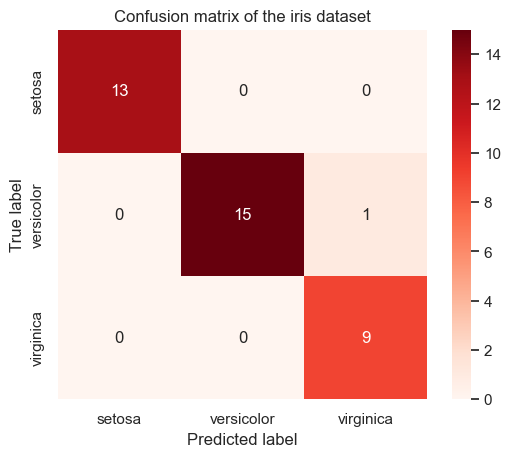

In [8]:
# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Train a logistic regression model
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train, y_train)

# Use the model to predict the class labels of the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set the labels for the plot
labels = iris.target_names

# Create the plot using seaborn
sns.set()
sns.heatmap(cm, square=True, annot=True, cmap="Reds", xticklabels=labels, yticklabels=labels)

# Set the plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix of the iris dataset')

# Show the plot
plt.show()

**C.Use k-nearest neighbours to classify the iris data set with some different
values for k, and with uniform and distance-based weights. What will happen
when k grows larger for the different cases? Why does this happen? What do
you think is the best choice of k? Compute a confusion matrix for the best
uniform and distance-based classifiers.**

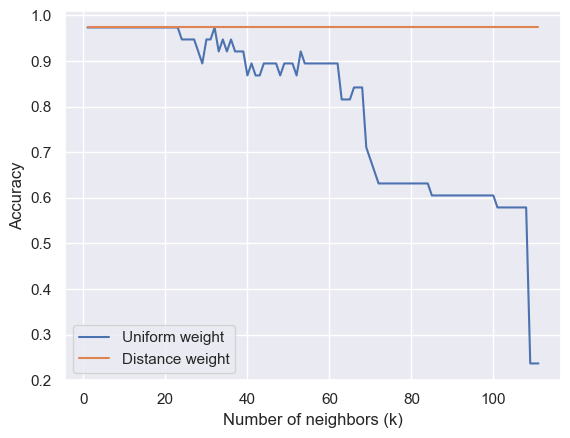

Confusion matrix for best uniform classifier (k=3):
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Confusion matrix for best distance-based classifier (k=5):
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


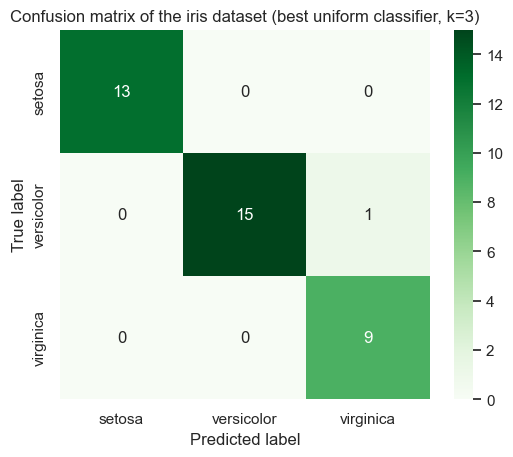

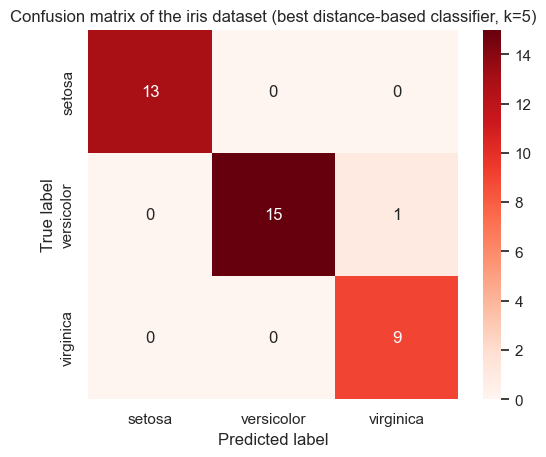

In [22]:
# Load the iris dataset
iris = load_iris()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

# Define a range of k values to try
k_values = [1, 3, 5, 7, 9]

# Define a list of weights to try
weights = ['uniform', 'distance']

# Initialize an empty dictionary to store the confusion matrices for each k and weight combination
confusion_matrices = {}

# Loop over the different k and weight combinations and fit a k-NN model to the training data for each one
for k in k_values:
    for weight in weights:
        # Create a k-NN classifier with the current k and weight
        clf = KNeighborsClassifier(n_neighbors=k, weights=weight)

        # Fit the classifier to the training data
        clf.fit(X_train, y_train)

        # Use the classifier to predict the class labels of the test set
        y_pred = clf.predict(X_test)

        # Create a confusion matrix for the predictions
        cm = confusion_matrix(y_test, y_pred)

        # Store the confusion matrix in the dictionary with a key of (k, weight)
        confusion_matrices[(k, weight)] = cm
        
# Plot accuracy scores for different k values
plt.plot(k_range, accuracy_uniform, label="Uniform weight")
plt.plot(k_range, accuracy_distance, label="Distance weight")
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()        

# Print the confusion matrix for the best uniform classifier
best_uniform_k = 3
best_uniform_cm = confusion_matrices[(best_uniform_k, 'uniform')]
print(f'Confusion matrix for best uniform classifier (k={best_uniform_k}):')
print(best_uniform_cm)

# Print the confusion matrix for the best distance-based classifier
best_distance_k = 5
best_distance_cm = confusion_matrices[(best_distance_k, 'distance')]
print(f'Confusion matrix for best distance-based classifier (k={best_distance_k}):')
print(best_distance_cm)

# Create a heatmap of the best uniform classifier's confusion matrix
sns.set()
sns.heatmap(best_uniform_cm, square=True, annot=True, cmap="Greens", xticklabels=iris.target_names, yticklabels=iris.target_names)

# Set the plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title(f'Confusion matrix of the iris dataset (best uniform classifier, k={best_uniform_k})')


# Show the plot
plt.show()




# Create a heatmap of the best distance-based classifier's confusion matrix
sns.set()
sns.heatmap(best_distance_cm, square=True, annot=True, cmap="Reds", xticklabels=iris.target_names, yticklabels=iris.target_names)

# Set the plot labels
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title(f'Confusion matrix of the iris dataset (best distance-based classifier, k={best_distance_k})')

# Show the plot
plt.show()




**D.Compare the logistic regression classifier in (a) with the k-nearest neighbour
classifiers in (b). What do you observe? Are all classes equally challenging for
the models to predict?**

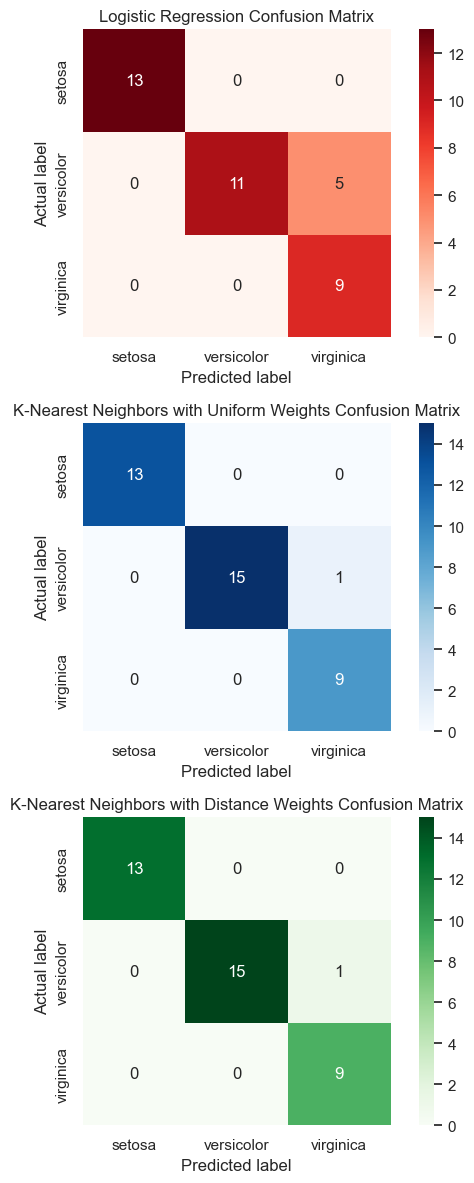

In [27]:
# Load iris dataset
iris = datasets.load_iris()

# Load training and test sets (using 25% test set and 75% learning set)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)

# Logistic Regression
# Make an instance of the model (one-vs-rest option)
logisticRegr = LogisticRegression(multi_class="ovr", solver="liblinear")

# Training the model on the data
logisticRegr.fit(x_train, y_train)

# Make predictions on entire test data
predictions_lr = logisticRegr.predict(x_test)

# K-Nearest Neighbors with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Training the model on the data
knn_uniform.fit(x_train, y_train)

# Make predictions on entire test data
predictions_knn_uniform = knn_uniform.predict(x_test)

# K-Nearest Neighbors with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Training the model on the data
knn_distance.fit(x_train, y_train)

# Make predictions on entire test data
predictions_knn_distance = knn_distance.predict(x_test)

# Confusion matrices
cm_lr = metrics.confusion_matrix(y_test, predictions_lr)
cm_knn_uniform = metrics.confusion_matrix(y_test, predictions_knn_uniform)
cm_knn_distance = metrics.confusion_matrix(y_test, predictions_knn_distance)

# Labels for plot
labels = iris.target_names

# Plot confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 12))
sns.heatmap(cm_lr, annot=True, square=True, cmap="Reds", xticklabels=labels, yticklabels=labels, ax=ax1)
ax1.set_ylabel("Actual label")
ax1.set_xlabel("Predicted label")
ax1.set_title("Logistic Regression Confusion Matrix")

sns.heatmap(cm_knn_uniform, annot=True, square=True, cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax2)
ax2.set_ylabel("Actual label")
ax2.set_xlabel("Predicted label")
ax2.set_title("K-Nearest Neighbors with Uniform Weights Confusion Matrix")

sns.heatmap(cm_knn_distance, annot=True, square=True, cmap="Greens", xticklabels=labels, yticklabels=labels, ax=ax3)
ax3.set_ylabel("Actual label")
ax3.set_xlabel("Predicted label")
ax3.set_title("K-Nearest Neighbors with Distance Weights Confusion Matrix")

plt.tight_layout()
plt.show()